In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.describe

<bound method NDFrame.describe of        num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19              

In [4]:
df.shape

(50000, 14)

In [5]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
print(df.isnull().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [18]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [19]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.053564
booking_origin           0.049947
flight_duration          0.016727
length_of_stay           0.009312
wants_extra_baggage      0.009009
wants_in_flight_meals    0.005821
num_passengers           0.003347
wants_preferred_seat     0.003142
flight_hour              0.002462
sales_channel            0.000763
purchase_lead            0.000457
flight_day               0.000002
trip_type                0.000000
Name: MI Scores, dtype: float64

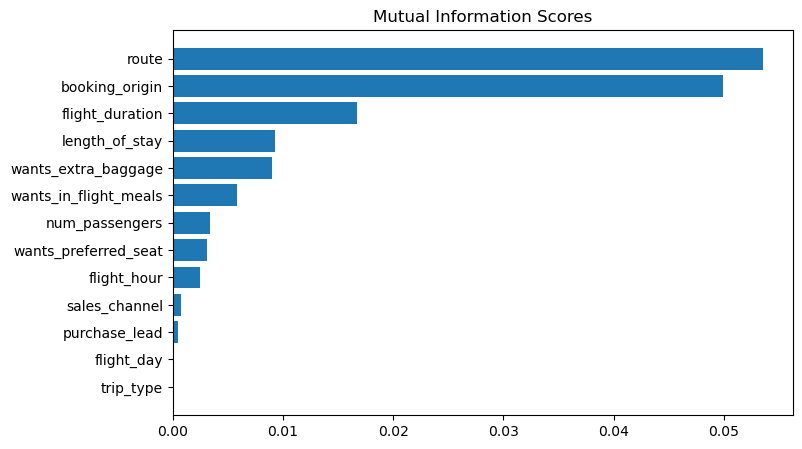

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

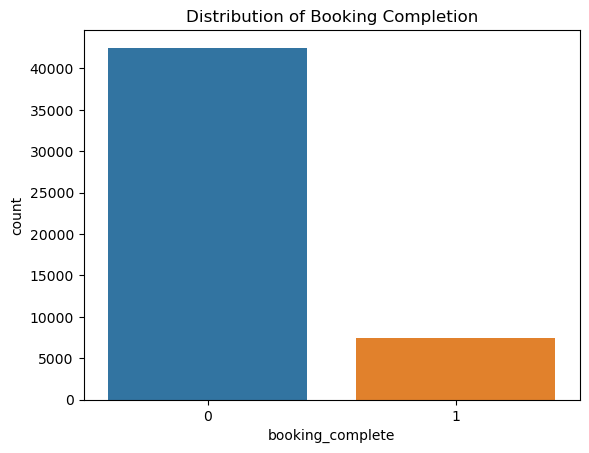

In [8]:
#  Distribution of the target variable (booking_complete)
sns.countplot(x='booking_complete', data=df)
plt.title('Distribution of Booking Completion')

plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

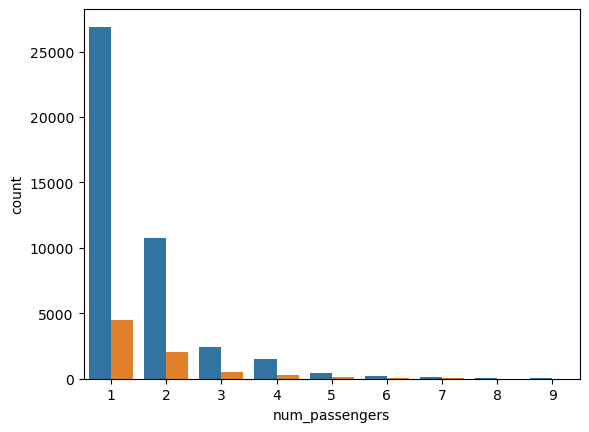

In [9]:
sns.countplot(data=df,x='num_passengers' , hue='booking_complete')
plt.title('Number of Passengers vs. Booking Completion')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


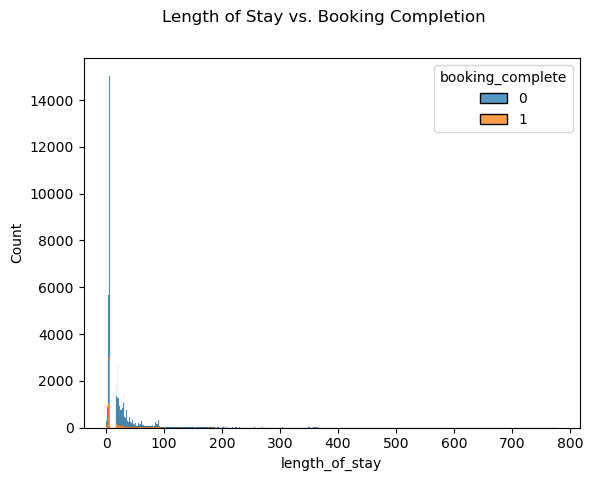

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


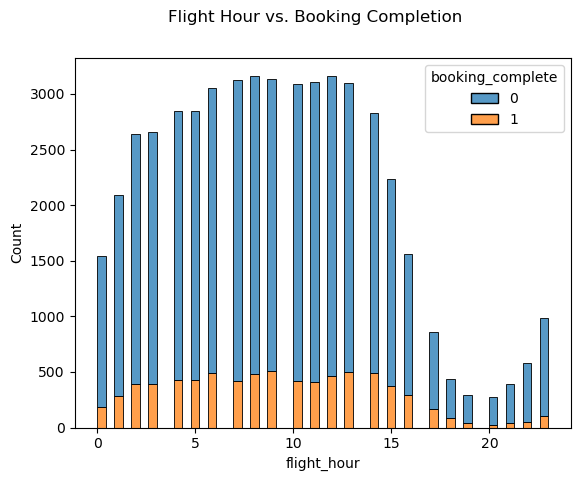

In [10]:
#  Length of stay vs. booking completion
sns.histplot(data=df, x='length_of_stay', hue='booking_complete', multiple='stack')
plt.suptitle('Length of Stay vs. Booking Completion')
plt.show()

#  Flight hour vs. booking completion
sns.histplot(data=df, x='flight_hour', hue='booking_complete', multiple='stack')
plt.suptitle('Flight Hour vs. Booking Completion')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


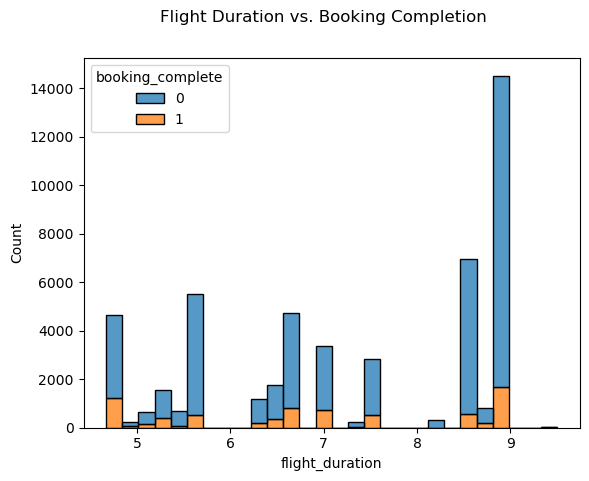

In [11]:
#  Flight duration vs. booking completion
sns.histplot(data=df, x='flight_duration', hue='booking_complete', multiple='stack')
plt.suptitle('Flight Duration vs. Booking Completion')
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Load your dataset into df
df = pd.read_csv('customer_booking.csv', encoding='latin1')

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin', 'flight_day'])

# Create a new feature: total_extras (sum of wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals)
data['total_extras'] = data['wants_extra_baggage'] + data['wants_preferred_seat'] + data['wants_in_flight_meals']

# Dropping original 'wants_' columns as they are now represented by 'total_extras'
data.drop(['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals'], axis=1, inplace=True)

# Define features and target variable
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000

Accuracy: 0.8549


In [13]:

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

Cross-validation scores: [0.8499 0.7548 0.7072 0.4959 0.7606]
Mean cross-validation score: 0.7136800000000001


In [14]:

# Predicting on X_test (already split from the original dataset)
print("\nPredictions on X_test:")
predictions = model.predict(X_test)
print(predictions)



Predictions on X_test:
[0 0 0 ... 0 0 0]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif

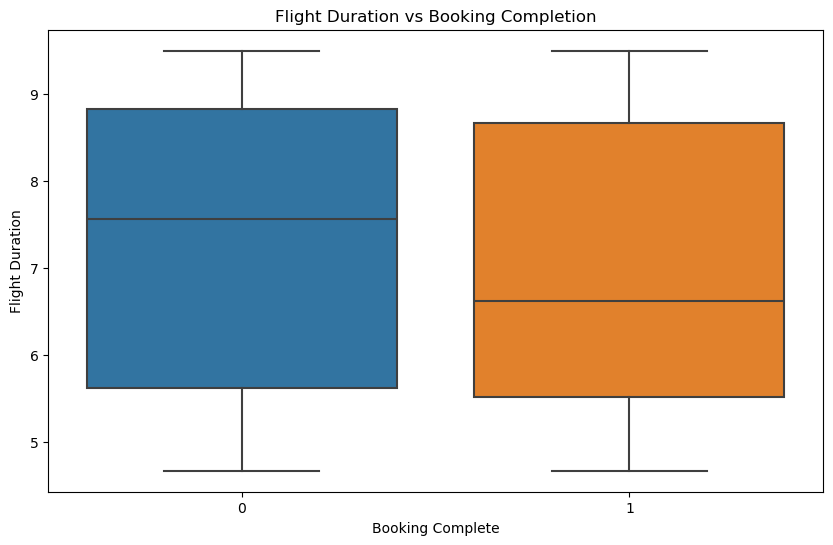

In [21]:

    # Plot the relationship between flight duration and booking completion
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='booking_complete', y='flight_duration', data=df)
    plt.title('Flight Duration vs Booking Completion')
    plt.xlabel('Booking Complete')
    plt.ylabel('Flight Duration')
    plt.show()


                  Feature  Importance
3           purchase_lead    0.194719
7                   route    0.150119
5             flight_hour    0.140106
4          length_of_stay    0.124758
8          booking_origin    0.110470
6              flight_day    0.090166
12        flight_duration    0.073493
0          num_passengers    0.048946
11  wants_in_flight_meals    0.022185
10   wants_preferred_seat    0.016856
9     wants_extra_baggage    0.014881
1           sales_channel    0.011695
2               trip_type    0.001609


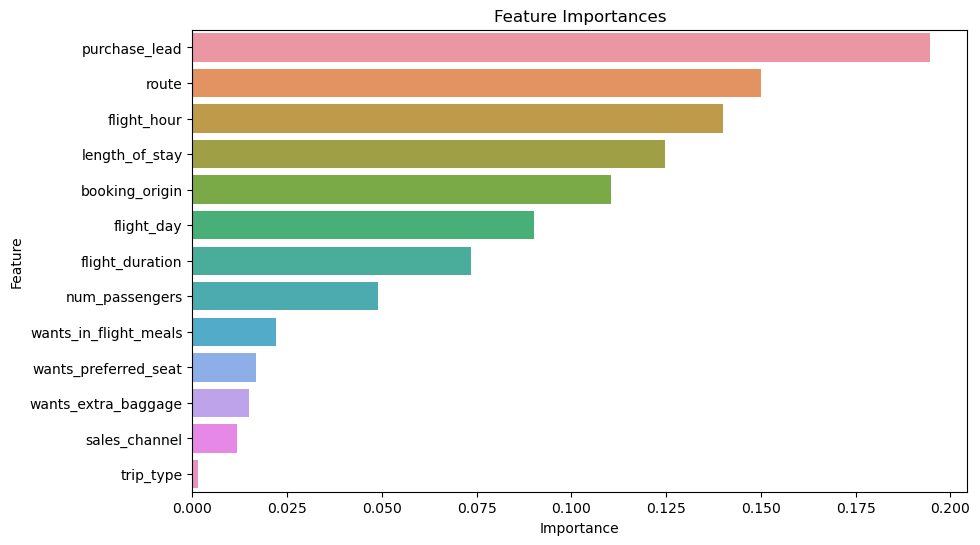

In [22]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)



# Feature importances from the RandomForest model
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()
